<a href="https://colab.research.google.com/github/Shraddha0704/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** - Shraddha Shandilya
##### **Team Member 2 -** - Sanyam Jain
##### **Team Member 3 -** - Yaseer Pathan
##### **Team Member 4 -** - Yaser Zaidi
##### **Team Member 5 -** - Abhishek Bhargava


# **Project Summary -**

 First we do Exploratory Data Analysis on the data set. We look for missing data values,duplicates values (none were found) and outliers and appropriately modify them. we have seen relation b/w numeric features and dependent variables and seen seasonwise and weekdays- weekend monthly distribution of rented bike count. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering to modify few existing columns and drop out irrelavant ones.we have seen skewness in data set  and to remove skewness we have used square root transforming.

We then look at several popular individual models from simple ones like Linear Regressor and Regularization Models (Ridge and Lasso) to more complicated ensemble ones like Decision Tree, Random Forest, XG Boost and Light GBM. 


# **GitHub Link -**

https://github.com/Shraddha0704/Bike-Sharing-Demand-Prediction

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### **Import Libraries**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing the dataset
rental_bike_df = pd.read_csv('/content/drive/MyDrive/Bike_Sharing_Demand_Prediction/SeoulBikeData.csv',encoding='ISO-8859-1')

## 3. ***Data Wrangling***

### Dataset First View

In [4]:
# Dataset First Look
rental_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Dataset Rows & Columns count
rental_bike_df.shape

(8760, 14)

### Dataset Rows & Columns count

### Dataset Information

In [6]:
# Dataset Info
rental_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(rental_bike_df[rental_bike_df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
rental_bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

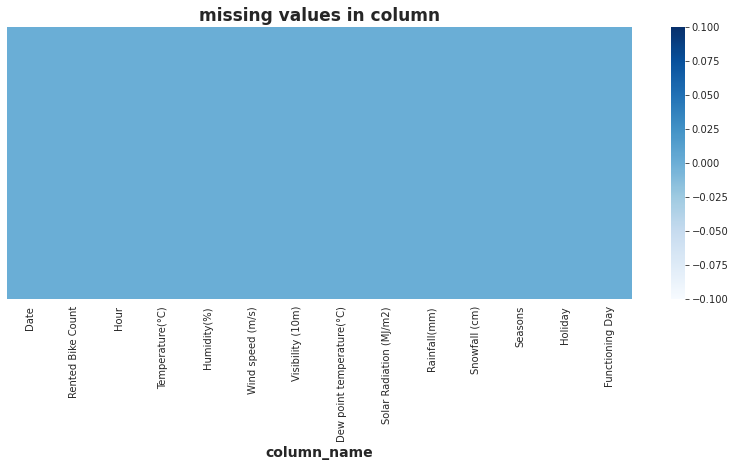

In [9]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(rental_bike_df.isnull(), cbar=True, yticklabels=False,cmap="Blues")
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

## What did you know about your dataset?

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
### Attribute Information:
* ### **Date** : year-month-day
* ### **Rented Bike count:** Count of bikes rented at each hour
* ### **Hour** - Hour of the day
* ### **Temperature:**Temperature in Celsius
* ### **Humidity:**-%
* ### **Windspeed :**-m/s
* ### **Visibility:**-10m
* ### **Dew point temperature:**-Celsius
* ### **Solar radiation :**-MJ/m2
* ### **Rainfall:**-mm
* ### **Snowfall :**-cm
* ### **Seasons :**- Winter, Spring, Summer, Autumn
* ### **Holiday :**- Holiday/No holiday
* ### **Functional Day :**-- NoFunc(Non Functional Hours), Fun(Functional hours)

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
rental_bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
rental_bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

we get to know about our data is:

*   Four features are of integer data types.
*   Six features are of float data types.
*   Four features are of object data types.
*   Also there are no null values.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in ['Seasons','Holiday','Functioning Day']:
  print(rental_bike_df[i].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [13]:
# Numeric Features

numeric_features = rental_bike_df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

## **Exploratory Data Analysis**

In [14]:
# creating a dataframe containing the sum of all column values pertaining to differant seasons

df_1 = rental_bike_df.groupby('Seasons').sum()
df_1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Seasons,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6


array([<AxesSubplot:ylabel='Rented Bike Count'>], dtype=object)

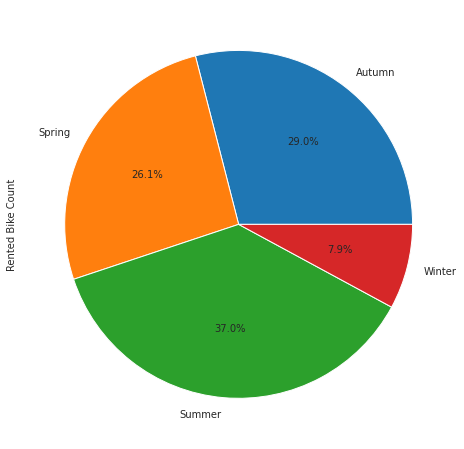

In [15]:
# creating a pie chart of bike count in differant seasons

df_1['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8), autopct = "%1.1f%%")


conclusions from above pie chart:

 Most bikes have been rented in the summer season.
least bike rent count is in winter season.
autumn and spring seasons have almost equal amounts of bike rent count.


In [16]:
# Working on Categorical features
# Date columns to Date format conversion
rental_bike_df['Date']= pd.to_datetime(rental_bike_df['Date'])


In [17]:
# creating a column containing the year from a particular date

year = []
for i in range(len(rental_bike_df['Date'])):
  year.append(rental_bike_df['Date'][i].year)
rental_bike_df['year'] = year  


In [18]:
# creating a series which shows total number of bikes rented in each year

df_year = rental_bike_df.groupby('year').sum()['Rented Bike Count']
df_year

year
2017     185330
2018    5986984
Name: Rented Bike Count, dtype: int64

<AxesSubplot:xlabel='year'>

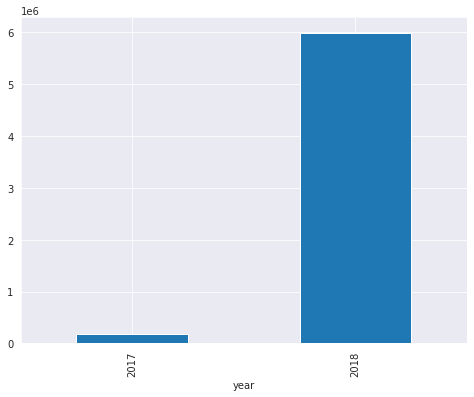

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
df_year.plot(kind='bar', ax=ax)




Above plot shows that most of the bikes have been rented in the year 2018.



In [20]:
# creating a series which shows total number of bikes rented on the type of day

df_hol = rental_bike_df.groupby('Holiday').sum()
df_hol

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year
Holiday,,,,,,,,,,,
Holiday,215895,4968,4298.3,23212,790.4,657366,106.2,237.49,33.7,22.0,871680
No Holiday,5956419,95772,108556.1,486850,14319.8,11929228,35580.4,4747.92,1268.8,635.6,16805256


array([<AxesSubplot:ylabel='Rented Bike Count'>], dtype=object)

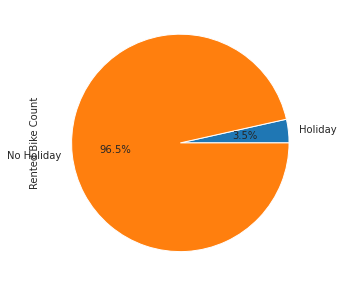

In [21]:
df_hol['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(5, 5) ,autopct = "%1.1f%%" )

Above plot shows that most of the bikes have been rented on working days.



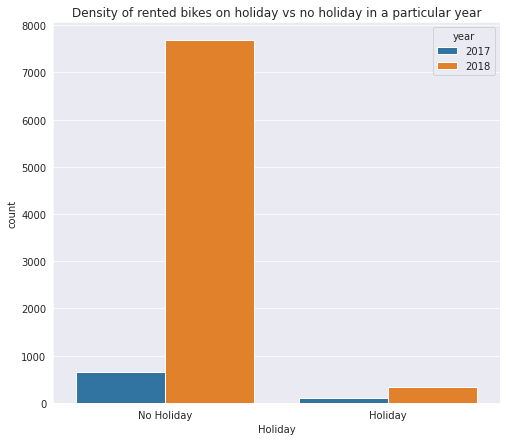

In [22]:
# bikes rented on type of day in each year

plt.figure(figsize=(8,7))
sns.countplot(x='Holiday', hue = 'year', data= rental_bike_df)
plt.title('Density of rented bikes on holiday vs no holiday in a particular year')
plt.show()


In [23]:
# extracting day,month, day of week and weekdays/weekend from date column
rental_bike_df['month'] = rental_bike_df['Date'].apply(lambda x : x.month)
rental_bike_df['day_of_week'] = rental_bike_df['Date'].dt.day_name()
rental_bike_df['weekdays_weekend']=rental_bike_df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
#rental_bike_df=rental_bike_df.drop(columns=['Date','day_of_week'],axis=1)


In [24]:
rental_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day_of_week,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0


<AxesSubplot:xlabel='month', ylabel='count'>

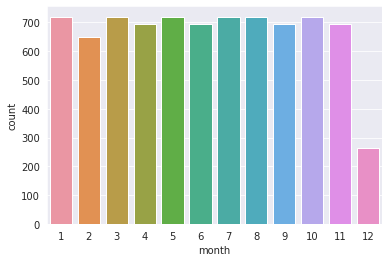

In [25]:
# plot showing the bikes rented in differant months in the year 2018

sns.countplot(rental_bike_df.loc[rental_bike_df['year']==2018,'month'])


 Above plot shows that very less bikes have been rented in december which is winter season.



In [26]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_rain = pd.DataFrame(rental_bike_df.groupby('Rainfall(mm)')['Rented Bike Count'].sum())


In [27]:
# resetting index of the dataframe

df_rain.reset_index(inplace=True)
df_rain.head()


,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


<AxesSubplot:xlabel='Rainfall(mm)', ylabel='Density'>

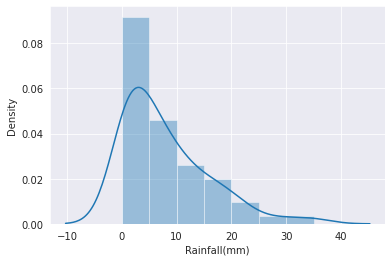

In [28]:
# plot showing distribution of bike rentals according to rainfall intensity

sns.distplot(df_rain['Rainfall(mm)'])


Above plot shows that people tend to rent bikes when there is no or less rainfall.



In [29]:
# creating a dataframe containing the count of bikes rented in differant intensities of snowfall

df_snow = pd.DataFrame(rental_bike_df.groupby('Snowfall (cm)')['Rented Bike Count'].sum())
df_snow.reset_index(inplace=True)


In [30]:
df_snow.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


<AxesSubplot:xlabel='Snowfall (cm)', ylabel='Density'>

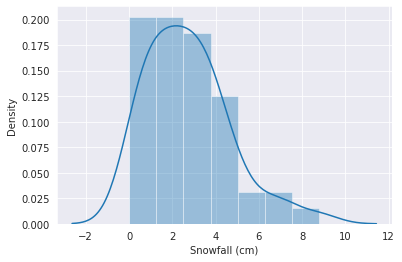

In [31]:
# plot showing distribution of bike rentals according to snowfall intensity

sns.distplot(df_snow['Snowfall (cm)'])

Above plot shows that people tend to rent bikes when there is no or less snowfall.



In [32]:
# creating a dataframe containing the count of bikes rented in differant intensities of tempreature

df_temp = pd.DataFrame(rental_bike_df.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)
df_temp.head()


,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


<AxesSubplot:xlabel='Temperature(°C)', ylabel='Density'>

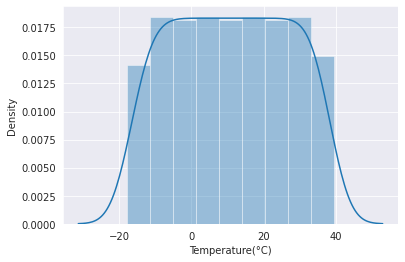

In [33]:
# plot showing distribution of bike rentals according to temperature intensity

sns.distplot(df_temp['Temperature(°C)'])


Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.



In [34]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

df_visibility = pd.DataFrame(rental_bike_df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visibility.reset_index(inplace=True)
df_visibility.head()

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65


<AxesSubplot:xlabel='Visibility (10m)', ylabel='Density'>

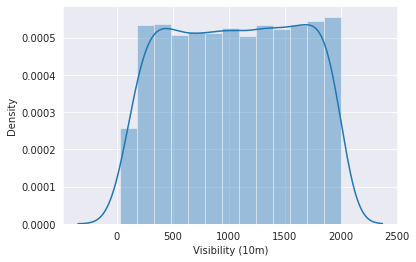

In [35]:
sns.distplot(df_visibility['Visibility (10m)'])


Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.


In [36]:
# creating a dataframe containing the count of bikes rented in differant intensities of humidity

df_humidity = pd.DataFrame(rental_bike_df.groupby('Humidity(%)')['Rented Bike Count'].sum())
df_humidity.reset_index(inplace=True)
df_humidity.head()

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353


<AxesSubplot:xlabel='Humidity(%)', ylabel='Density'>

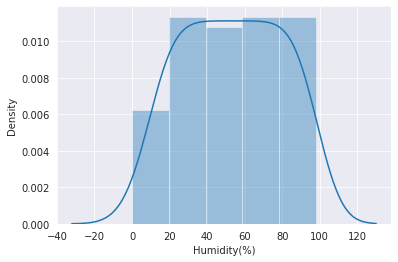

In [37]:
sns.distplot(df_humidity['Humidity(%)'])


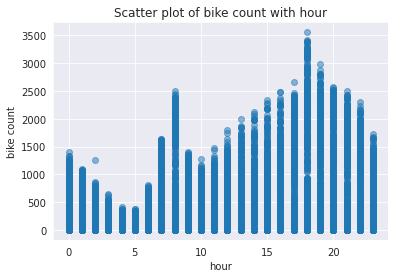

In [38]:
# scatter plot of bike count at hour of a particular day

plt.scatter(rental_bike_df['Hour'], rental_bike_df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with hour')
plt.xlabel('hour')
plt.ylabel('bike count')
plt.show()


 From above its clear that the rentals were more in the morning and evening.This is because people not having personal vehicle, commuting to offices and schools tend to rent bikes.



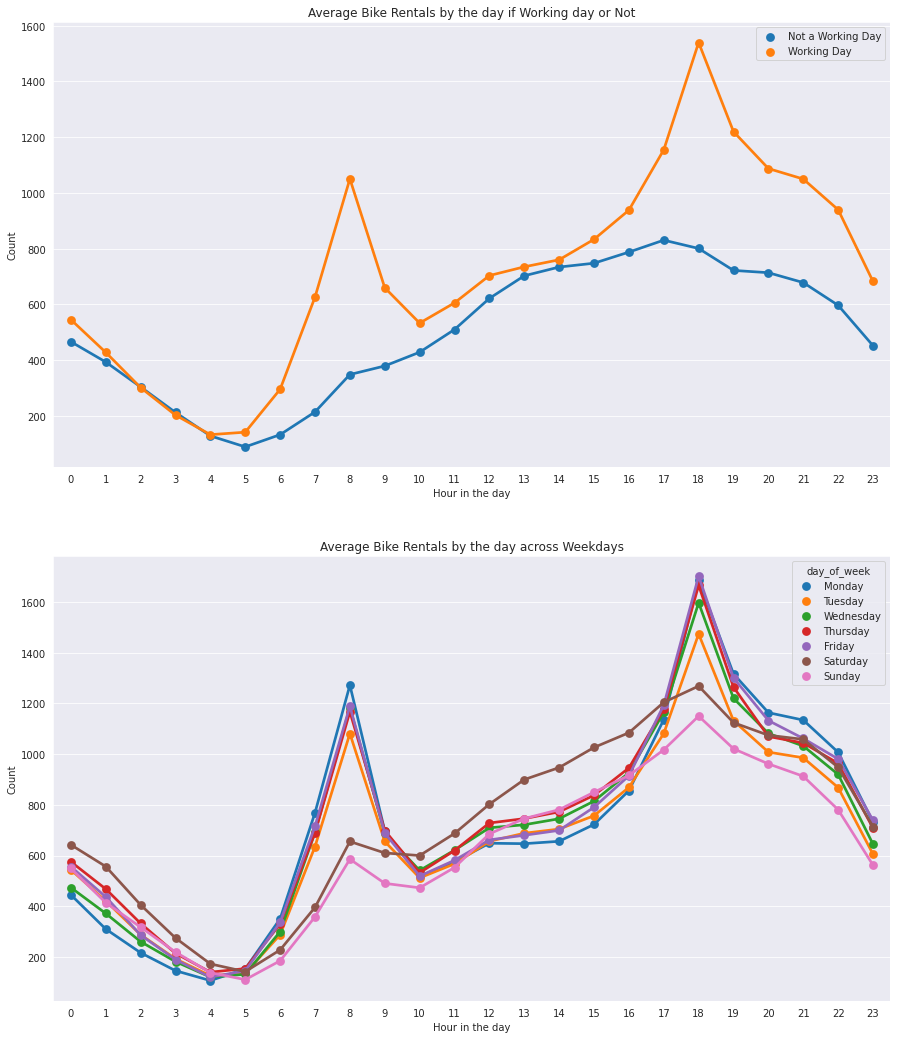

In [39]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 18))
group_work_hour = pd.DataFrame(rental_bike_df.groupby(['Holiday', 'Hour'])['Rented Bike Count'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='Hour', y='Rented Bike Count', hue='Holiday', ax=axes[0], legend=True)
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day if Working day or Not')

hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour = pd.DataFrame(rental_bike_df.groupby(['day_of_week', 'Hour'])['Rented Bike Count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='Hour', y='Rented Bike Count', hue='day_of_week', ax=axes[1], hue_order=hue_order)
axes[1].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Weekdays')



plt.show()



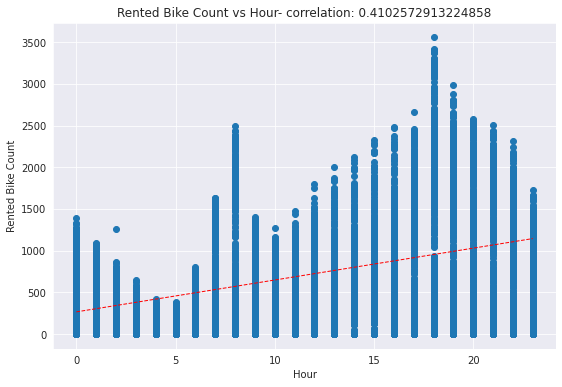

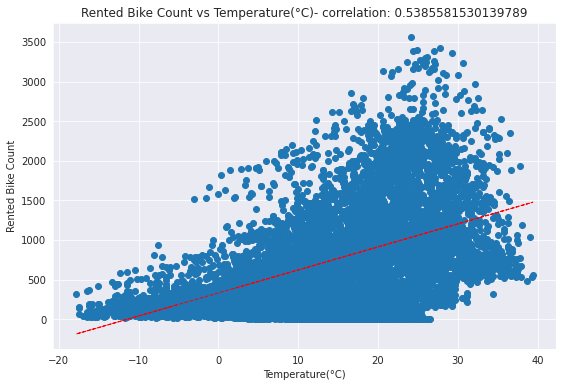

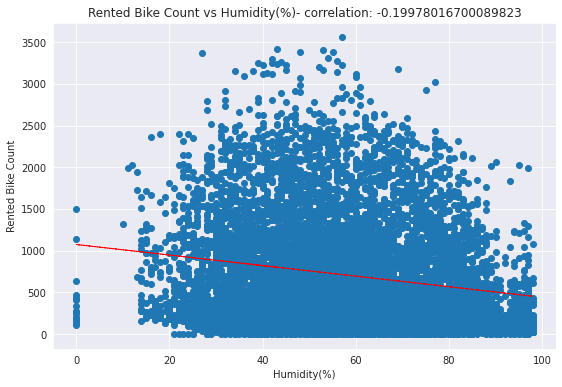

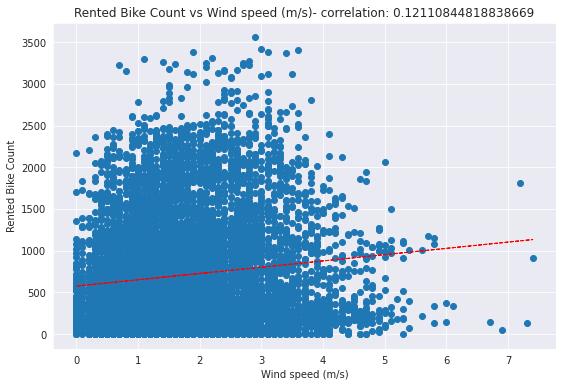

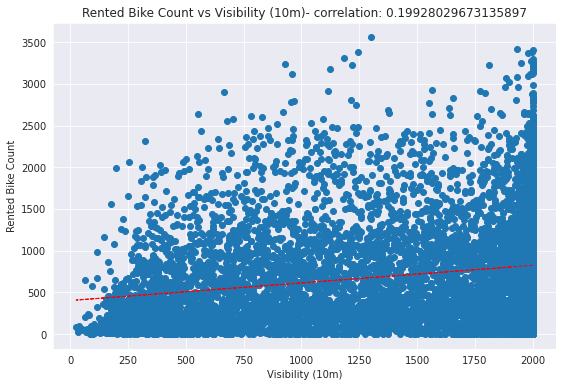

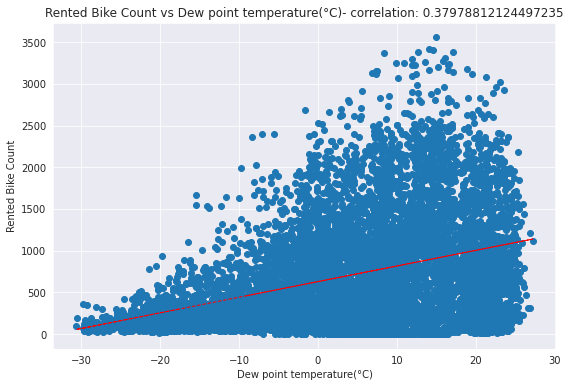

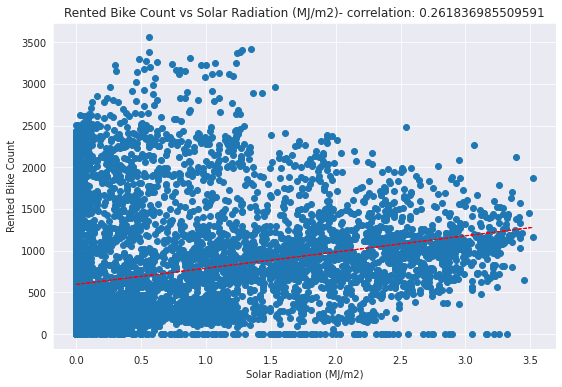

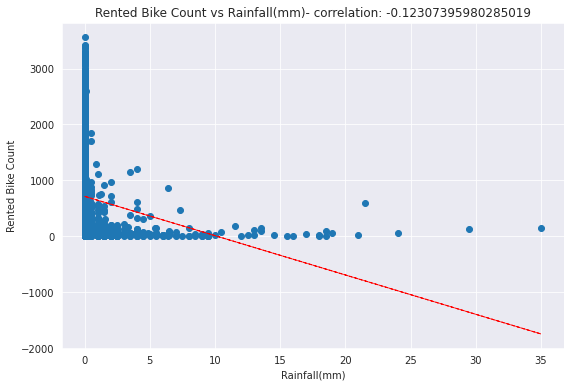

In [40]:
## plot a bar plot for each categorical feature count (except Date & Rented Bike Count)
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = rental_bike_df[col]
    label = rental_bike_df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(rental_bike_df[col], rental_bike_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(rental_bike_df[col])

    plt.plot(rental_bike_df[col], y_hat, "r--", lw=1)

plt.show()

In [41]:
#checking categorical variable
categorical_features = rental_bike_df.describe(include=['object','category']).columns

In [42]:
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day', 'day_of_week'], dtype='object')

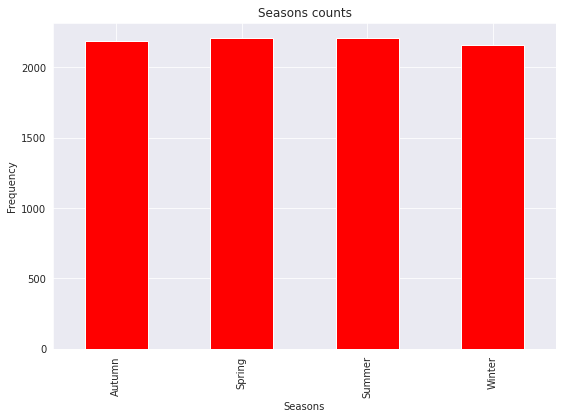

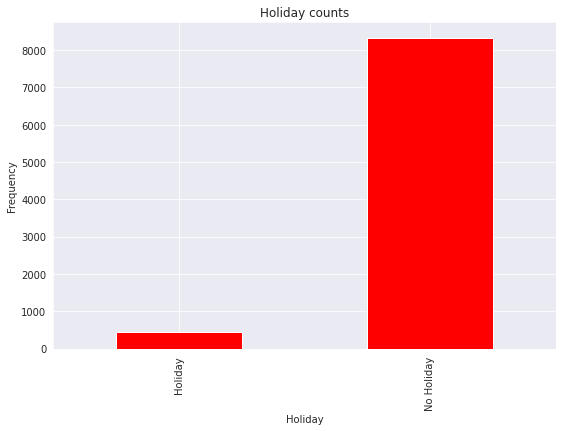

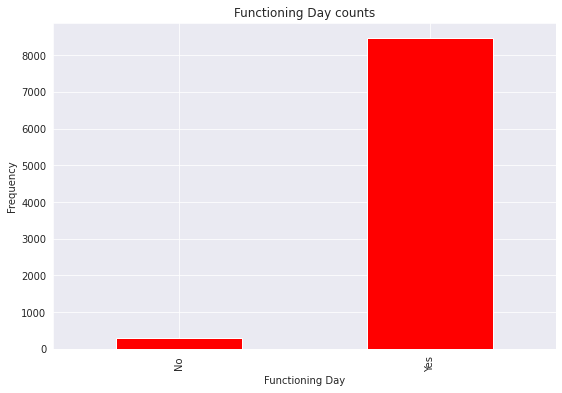

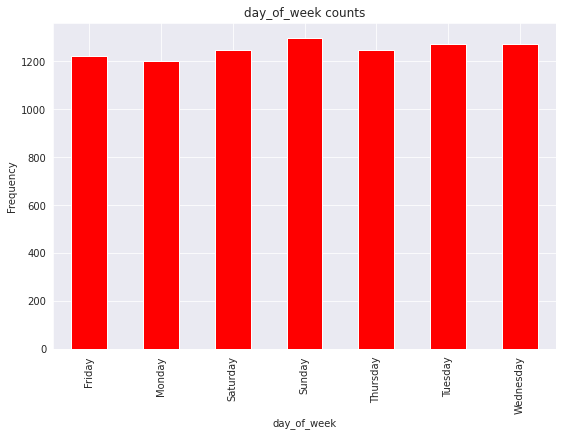

In [43]:
# plot a bar plot for each categorical feature count  

for col in categorical_features:
    counts = rental_bike_df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='red')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

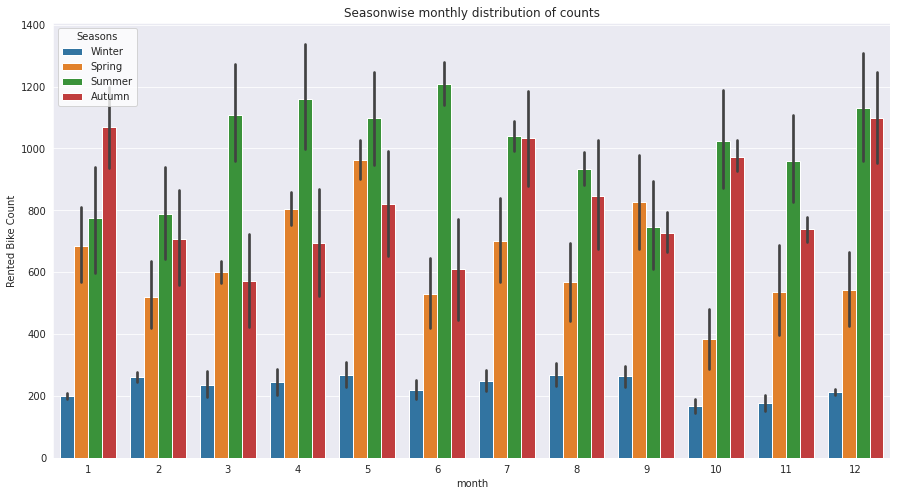

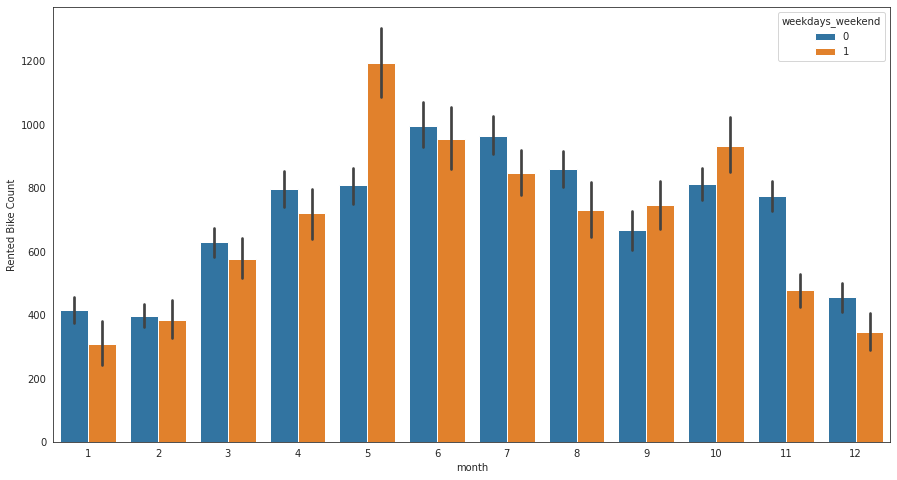

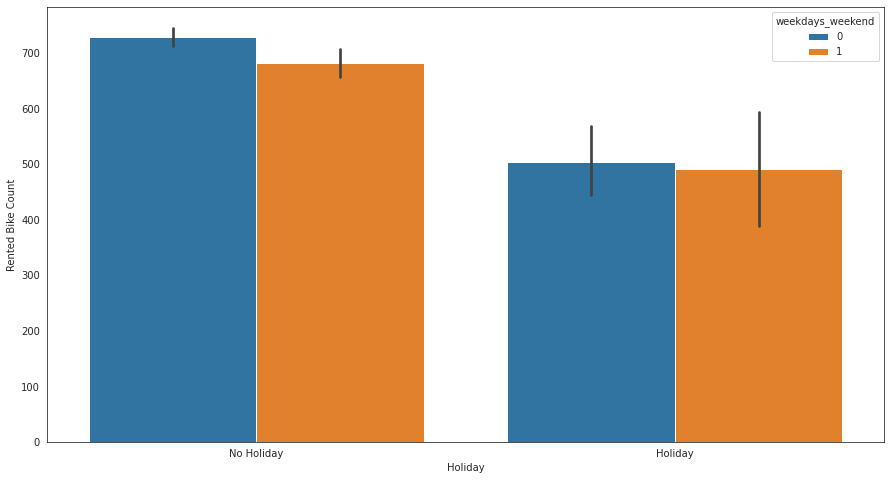

In [44]:
#relation between categoricals and dependent features
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='Rented Bike Count',data=rental_bike_df[['month','Rented Bike Count','Seasons']],hue='Seasons',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='Rented Bike Count',data=rental_bike_df[['month','Rented Bike Count','weekdays_weekend']],hue='weekdays_weekend',ax=ax1)
ax.set_title('Weekdays wise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='Holiday',y='Rented Bike Count',data=rental_bike_df[['Holiday','Rented Bike Count','weekdays_weekend']],hue='weekdays_weekend',ax=ax1)
ax.set_title('Holiday wise monthly distribution of counts')
plt.show()

## **Feature Engineering and Correlation:**

<AxesSubplot:>

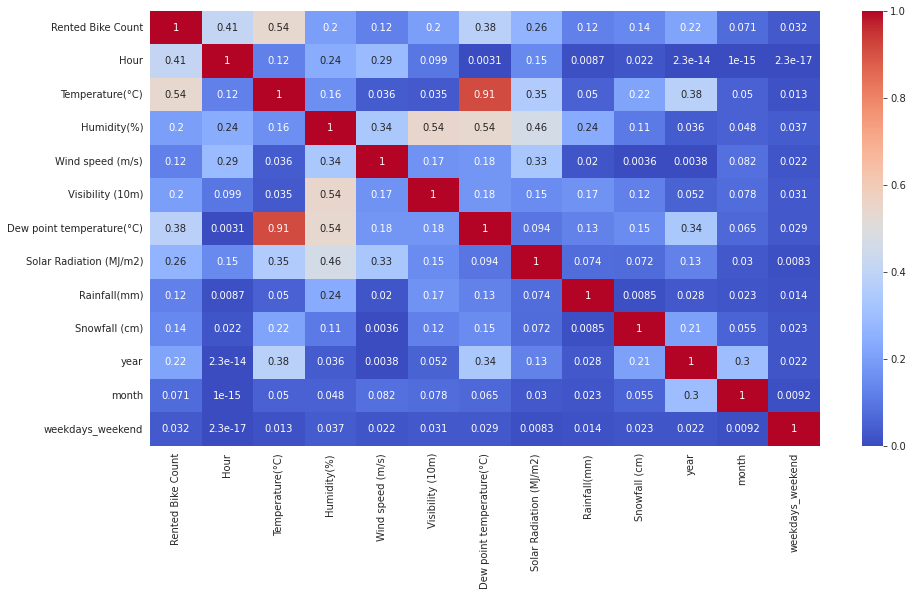

In [45]:
## Correlation 
plt.figure(figsize=(15,8))
correlation = rental_bike_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [46]:
# To remove Multicollinearity, using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [47]:
calc_vif(rental_bike_df[[i for i in rental_bike_df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','year'] ]])

,variables,VIF
0,Hour,3.961874
1,Temperature(°C),3.236809
2,Humidity(%),6.114153
3,Wind speed (m/s),4.616621
4,Visibility (10m),5.404128
5,Solar Radiation (MJ/m2),2.272068
6,Rainfall(mm),1.081252
7,Snowfall (cm),1.125304
8,month,4.580307
9,weekdays_weekend,1.399708


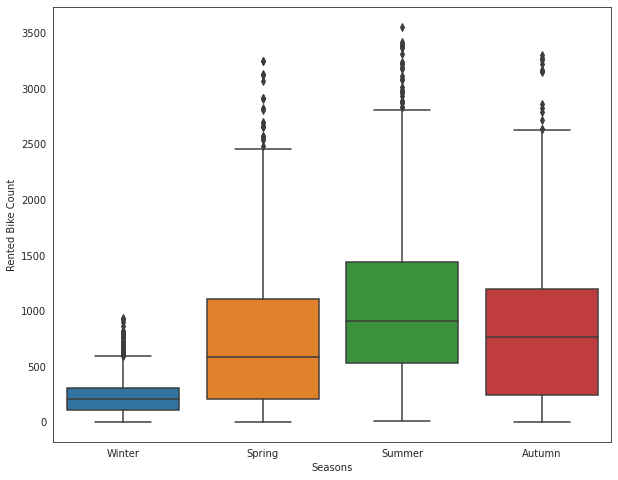

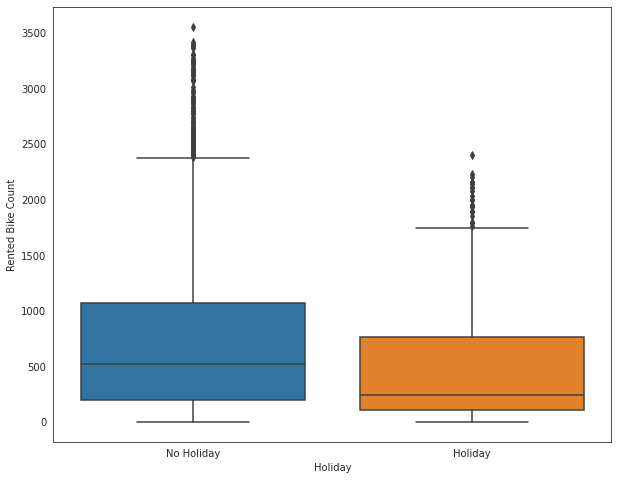

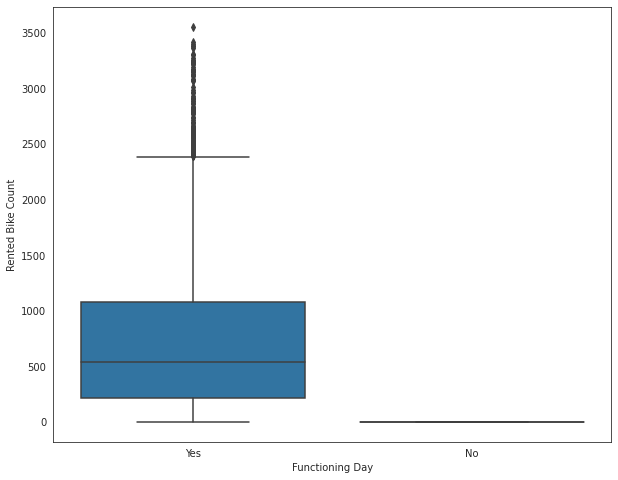

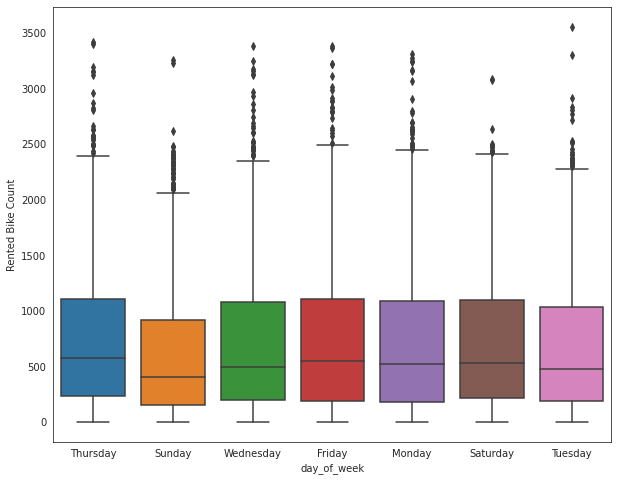

In [48]:
# showing relation between Categorical and Dependent Features
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=rental_bike_df[col],y=rental_bike_df["Rented Bike Count"])
  plt.show()

In [49]:
#treating outliers
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    rental_bike_df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return rental_bike_df

In [50]:
df_outlier_removed_SR=remove_outlier_IQR(rental_bike_df["Solar Radiation (MJ/m2)"])
df_outlier_removed_WS=remove_outlier_IQR(rental_bike_df["Wind speed (m/s)"])

df_outlier_removed_SR=pd.DataFrame(df_outlier_removed_SR)
df_outlier_removed_WS=pd.DataFrame(df_outlier_removed_WS)

ind_diff_SR=rental_bike_df.index.difference(df_outlier_removed_SR.index)
ind_diff_WS=rental_bike_df.index.difference(df_outlier_removed_WS.index)

in_first = set(ind_diff_SR)
in_second = set(ind_diff_WS)
result = in_second.union(in_first) 


for i in range(0, len(result),1):
        rental_bike_df.drop(i,inplace=True)

In [51]:
rental_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7989 entries, 771 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       7989 non-null   datetime64[ns]
 1   Rented Bike Count          7989 non-null   int64         
 2   Hour                       7989 non-null   int64         
 3   Temperature(°C)            7989 non-null   float64       
 4   Humidity(%)                7989 non-null   int64         
 5   Wind speed (m/s)           7989 non-null   float64       
 6   Visibility (10m)           7989 non-null   int64         
 7   Dew point temperature(°C)  7989 non-null   float64       
 8   Solar Radiation (MJ/m2)    7989 non-null   float64       
 9   Rainfall(mm)               7989 non-null   float64       
 10  Snowfall (cm)              7989 non-null   float64       
 11  Seasons                    7989 non-null   object        
 12  Holi

In [52]:
rental_bike_df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    1389
Name: Seasons, dtype: int64

In [53]:
# Create dummy variables for the catgeorical variable Seasons,Holiday,Functioning Day

rental_bike_df['Winter_Season'] = np.where(rental_bike_df['Seasons']=='Winter', 1, 0)
rental_bike_df['Spring_Season'] = np.where(rental_bike_df['Seasons']=='Spring', 1, 0)
rental_bike_df['Summer_Season'] = np.where(rental_bike_df['Seasons']=='Summer', 1, 0)
rental_bike_df['Autumn_Season'] = np.where(rental_bike_df['Seasons']=='Autumn', 1, 0)
rental_bike_df['Holiday'] = np.where(rental_bike_df['Holiday']=='No Holiday', 1, 0)
rental_bike_df['Functioning Day'] = np.where(rental_bike_df['Functioning Day']=='Yes', 1, 0)

# Drop the original column Seasons from the dataframe
rental_bike_df.drop(columns=['Seasons'],axis=1,inplace=True)


In [54]:
rental_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Holiday,Functioning Day,year,month,day_of_week,weekdays_weekend,Winter_Season,Spring_Season,Summer_Season,Autumn_Season
771,2018-02-01,41,3,-2.5,62,0.4,1626,-8.7,0.0,0.0,...,1,1,2018,2,Thursday,0,1,0,0,0
772,2018-02-01,31,4,-2.7,67,0.5,1302,-7.9,0.0,0.0,...,1,1,2018,2,Thursday,0,1,0,0,0
773,2018-02-01,58,5,-3.1,67,0.6,1384,-8.3,0.0,0.0,...,1,1,2018,2,Thursday,0,1,0,0,0
774,2018-02-01,139,6,-3.2,67,0.4,1409,-8.4,0.0,0.0,...,1,1,2018,2,Thursday,0,1,0,0,0
775,2018-02-01,344,7,-3.2,69,0.5,1249,-8.0,0.0,0.0,...,1,1,2018,2,Thursday,0,1,0,0,0


<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

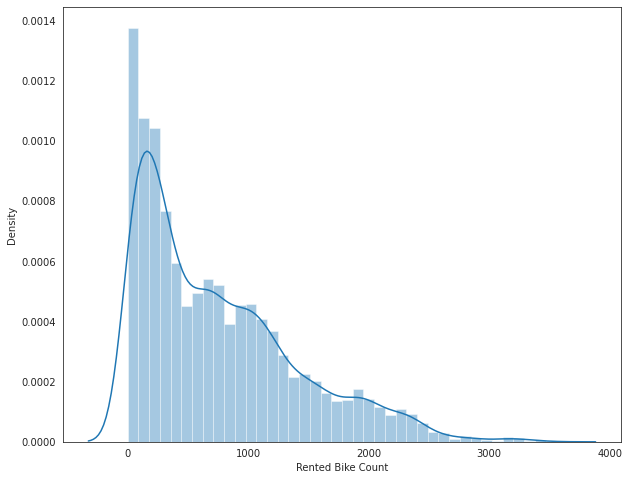

In [55]:
#visualising distribution
plt.figure(figsize=(10,8))

sns.distplot(rental_bike_df['Rented Bike Count'])

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

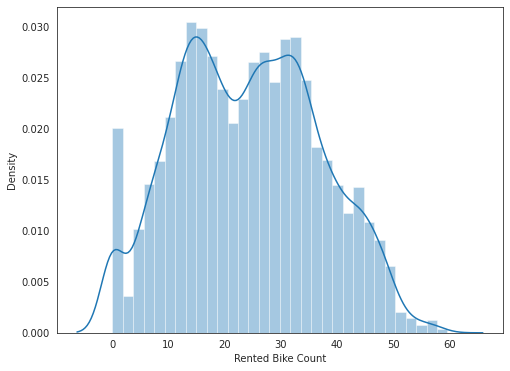

In [56]:
# square_root transformation

plt.figure(figsize=(8,6))
sns.distplot(np.sqrt(rental_bike_df['Rented Bike Count']))


In [57]:
# drop the date column in dataset
rental_bike_df=rental_bike_df.drop(columns=['Date','day_of_week'],axis=1)


## ***ML Model Implementation***

### **Linear Regression**

In [58]:
#creating list of matrix to store the evaluation matrix of all model
MSE=[]
RMSE=[]
R2=[]
Adj_R2=[]


In [59]:
# ML Model - 1 Implementation
dependent_variable = 'Rented Bike Count'

In [60]:
# Create a list of independent variables
independent_variables = list(set(rental_bike_df.columns.tolist()) - {dependent_variable})
independent_variables

['Solar Radiation (MJ/m2)',
 'month',
 'Autumn_Season',
 'Hour',
 'Holiday',
 'year',
 'Temperature(°C)',
 'Visibility (10m)',
 'Summer_Season',
 'Snowfall (cm)',
 'Winter_Season',
 'Dew point temperature(°C)',
 'Spring_Season',
 'Functioning Day',
 'Wind speed (m/s)',
 'weekdays_weekend',
 'Rainfall(mm)',
 'Humidity(%)']

In [61]:
# Create the data of independent variables
X = rental_bike_df[independent_variables].values

# Create the dependent variable data
y = rental_bike_df[dependent_variable].values

In [62]:
rental_bike_df[independent_variables]

,Solar Radiation (MJ/m2),month,Autumn_Season,Hour,Holiday,year,Temperature(°C),Visibility (10m),Summer_Season,Snowfall (cm),Winter_Season,Dew point temperature(°C),Spring_Season,Functioning Day,Wind speed (m/s),weekdays_weekend,Rainfall(mm),Humidity(%)
771,0.0,2,0,3,1,2018,-2.5,1626,0,0.0,1,-8.7,0,1,0.4,0,0.0,62
772,0.0,2,0,4,1,2018,-2.7,1302,0,0.0,1,-7.9,0,1,0.5,0,0.0,67
773,0.0,2,0,5,1,2018,-3.1,1384,0,0.0,1,-8.3,0,1,0.6,0,0.0,67
774,0.0,2,0,6,1,2018,-3.2,1409,0,0.0,1,-8.4,0,1,0.4,0,0.0,67
775,0.0,2,0,7,1,2018,-3.2,1249,0,0.0,1,-8.0,0,1,0.5,0,0.0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,11,1,19,1,2018,4.2,1894,0,0.0,0,-10.3,0,1,2.6,0,0.0,34
8756,0.0,11,1,20,1,2018,3.4,2000,0,0.0,0,-9.9,0,1,2.3,0,0.0,37
8757,0.0,11,1,21,1,2018,2.6,1968,0,0.0,0,-9.9,0,1,0.3,0,0.0,39
8758,0.0,11,1,22,1,2018,2.1,1859,0,0.0,0,-9.8,0,1,1.0,0,0.0,41


## ***Train and Test Split***

In [63]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [64]:
X_train[0:5]

array([[ 0.000e+00,  8.000e+00,  0.000e+00,  1.800e+01,  1.000e+00,
         2.018e+03,  2.390e+01,  9.910e+02,  1.000e+00,  0.000e+00,
         0.000e+00,  2.320e+01,  0.000e+00,  1.000e+00,  2.000e-01,
         0.000e+00,  1.500e+00,  9.600e+01],
       [ 2.020e+00,  7.000e+00,  0.000e+00,  1.700e+01,  1.000e+00,
         2.018e+03,  3.150e+01,  1.974e+03,  1.000e+00,  0.000e+00,
         0.000e+00,  2.070e+01,  0.000e+00,  1.000e+00,  3.700e+00,
         1.000e+00,  0.000e+00,  5.300e+01],
       [ 0.000e+00,  7.000e+00,  0.000e+00,  2.200e+01,  1.000e+00,
         2.018e+03,  2.800e+01,  1.542e+03,  1.000e+00,  0.000e+00,
         0.000e+00,  2.330e+01,  0.000e+00,  1.000e+00,  1.500e+00,
         0.000e+00,  0.000e+00,  7.600e+01],
       [ 0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
         2.018e+03, -1.500e+01,  1.766e+03,  0.000e+00,  3.000e-01,
         1.000e+00, -2.500e+01,  0.000e+00,  1.000e+00,  1.200e+00,
         1.000e+00,  0.000e+00,  4.200e+01],
    

# Feature Scaling

In [65]:
# Feature Scaling
#Transforming data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
X_train[0:5]

array([[0.        , 0.63636364, 0.        , 0.7826087 , 1.        ,
        0.        , 0.72902098, 0.48859605, 1.        , 0.        ,
        0.        , 0.93728223, 0.        , 1.        , 0.02702703,
        0.        , 0.04285714, 0.97959184],
       [0.57386364, 0.54545455, 0.        , 0.73913043, 1.        ,
        0.        , 0.86188811, 0.9868221 , 1.        , 0.        ,
        0.        , 0.89372822, 0.        , 1.        , 0.5       ,
        1.        , 0.        , 0.54081633],
       [0.        , 0.54545455, 0.        , 0.95652174, 1.        ,
        0.        , 0.8006993 , 0.76786619, 1.        , 0.        ,
        0.        , 0.93902439, 0.        , 1.        , 0.2027027 ,
        0.        , 0.        , 0.7755102 ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.04895105, 0.88139888, 0.        , 0.03409091,
        1.        , 0.09756098, 0.        , 1.        , 0.16216216,
        1.        , 0.        , 0.42857143],
    

In [67]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [68]:
regressor.intercept_

-3.8154578455634504e+16

In [69]:
regressor.coef_

array([-3.05978728e+02,  2.56195360e+01,  3.81545785e+16,  6.90354206e+02,
        1.14337490e+02, -3.31176511e+14,  9.94209820e+02,  3.47020783e+01,
        3.81545785e+16,  2.24730931e+02,  3.81545785e+16,  5.26446242e+02,
        3.81545785e+16,  9.25726287e+02,  1.31788827e+02, -5.40043809e+01,
       -1.93673691e+03, -1.04872919e+03])

In [70]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([ 880., 1352., 1400., ...,  368., 1480., 1328.])

In [71]:
y_train

array([  57, 1433, 1870, ...,  222, 2268,  906])

In [72]:
# Predicting the Test set results
y_pred_test = regressor.predict(X_test)
y_pred_test

array([ 592.,  528.,  928., ...,  528., 1368., 1216.])

In [73]:
y_test

array([ 202,    0,  387, ...,  241, 1430, 2235])

In [74]:
MSE_lr = mean_squared_error(y_test, y_pred_test)
MSE.append(MSE_lr)
MSE_lr

194159.76846057572

In [75]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

445.71086103844215

In [76]:
# Test performance
RMSE_lr = math.sqrt(mean_squared_error(y_test, y_pred_test))
RMSE.append(RMSE_lr)
RMSE_lr

440.6356413870486

In [77]:
r2_score(y_train, y_pred_train)

0.5410372314676372

In [78]:
R2_lr = r2_score(y_test, y_pred_test)
R2.append(R2_lr)
R2_lr

0.5444879832587386

In [79]:
adj_r2_lr =1-(1-r2_score(y_test,y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_lr)
print("Adjusted R2 : ",adj_r2_lr,'\n')

Adjusted R2 :  0.539295319356685 



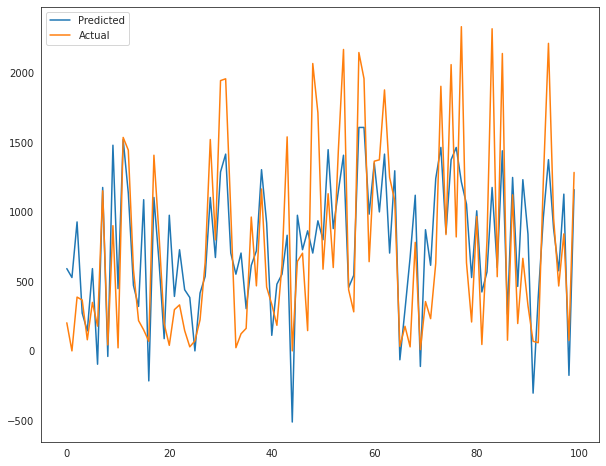

In [80]:
  plt.figure(figsize=(10,8))
  plt.plot((y_pred_test)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()


# **Regularised Linear Regression**

# **Lasso Regression**

In [81]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [82]:
lasso.score(X_train, y_train)

0.541022774486899

In [83]:
y_pred_testl = lasso.predict(X_test)

In [84]:
MSE_lasso = mean_squared_error(y_test, y_pred_testl)
MSE.append(MSE_lasso)

RMSE_lasso = math.sqrt(mean_squared_error(y_test, y_pred_testl))
RMSE.append(RMSE_lasso)

R2_lasso = r2_score(y_test, y_pred_testl)
R2.append(R2_lasso)

adj_r2_lasso =1-(1-r2_score(y_test,y_pred_testl))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_lasso)

print(f"MSE:{MSE_lasso},RMSE:{RMSE_lasso},R2:{R2_lasso},Adj_R2:{adj_r2_lasso}")

MSE:194086.5742736289,RMSE:440.55257833047455,R2:0.5446597017974154,Adj_R2:0.5394689954214518


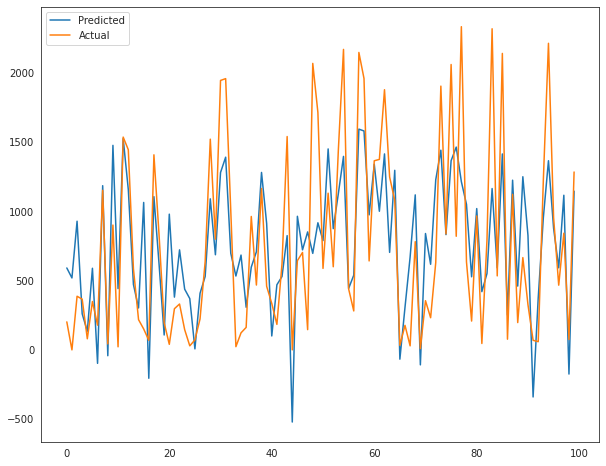

In [85]:
  plt.figure(figsize=(10,8))
  plt.plot(y_pred_testl[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()


In [86]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [87]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -199775.33152617808


In [88]:
y_pred_lasso = lasso_regressor.predict(X_test)

## **Ridge Regression**

In [89]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [90]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [91]:
ridge.score(X_train, y_train)

0.5410791116835816

In [92]:
y_pred_r = ridge.predict(X_test)

In [93]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [94]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -199748.43905936743


In [95]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [96]:
MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
MSE.append(MSE_ridge)

RMSE_ridge = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
RMSE.append(RMSE_ridge)

R2_ridge = r2_score(y_test, y_pred_ridge)
R2.append(R2_ridge)

adj_r2_ridge =1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_ridge)

print(f"MSE:{MSE_ridge},RMSE:{RMSE_ridge},R2:{R2_ridge},Adj_R2:{adj_r2_ridge}")

MSE:194107.61316454143,RMSE:440.57645552678076,R2:0.5446103431290077,Adj_R2:0.5394190740829798


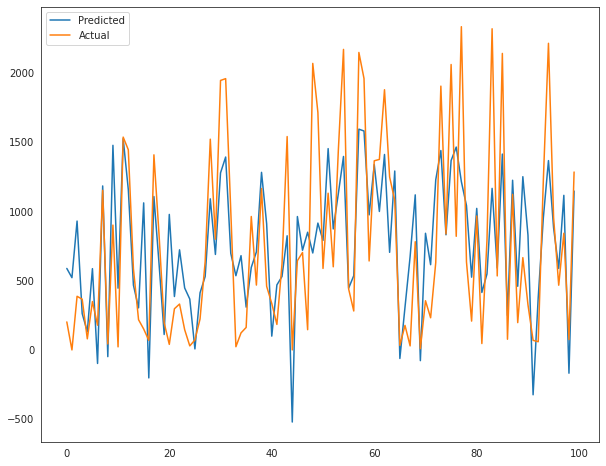

In [97]:
  plt.figure(figsize=(10,8))
  plt.plot(y_pred_ridge[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

 ## **Elastic net Regression**

In [98]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [99]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [100]:
elasticnet.score(X_train, y_train)

0.4491554307144914

In [101]:
y_pred_en = elasticnet.predict(X_test)

In [102]:
#cross validation
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [103]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [104]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}

Using  {'alpha': 0.0001, 'l1_ratio': 0.3}  the negative mean squared error is:  -199647.4877976948


In [105]:
MSE_EN = mean_squared_error(y_test, y_pred_elastic)
MSE.append(MSE_EN)

RMSE_EN = math.sqrt(mean_squared_error(y_test, y_pred_elastic))
RMSE.append(RMSE_EN)

R2_EN = r2_score(y_test, y_pred_elastic)
R2.append(R2_EN)

adj_r2_EN =1-(1-r2_score(y_test,y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_EN)

print(f"MSE:{MSE_EN},RMSE:{RMSE_EN},R2:{R2_EN},Adj_R2:{adj_r2_EN}")

MSE:193937.75697261308,RMSE:440.38364748547724,R2:0.545008837302928,Adj_R2:0.5398221109390602


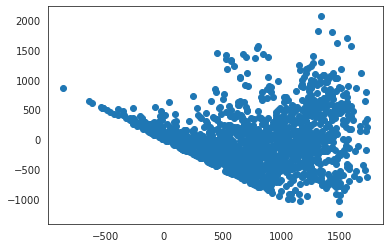

In [106]:
### Heteroscedasticity
plt.scatter((y_pred_lasso),(y_test)-(y_pred_lasso))

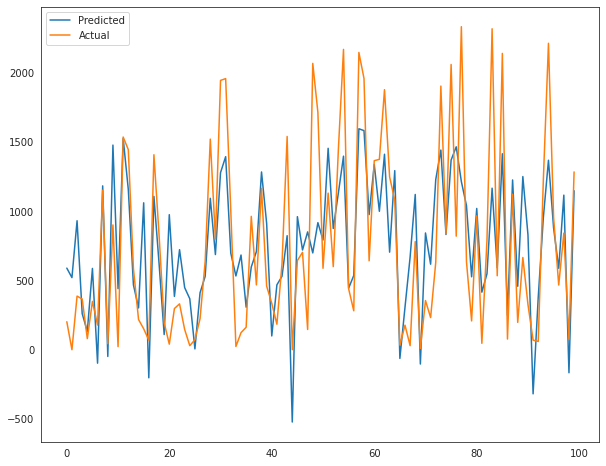

In [107]:
  plt.figure(figsize=(10,8))
  plt.plot(y_pred_elastic[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

## **Decision Tree**

In [108]:
rental_bike_df.shape

(7989, 19)

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=5)
gridSearch_decisionTree.fit(X_train,y_train)

decisionTree.fit(X_train,y_train)
best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,y_test)

In [111]:
y_pred_DT = gridSearch_decisionTree.predict(X_test)

In [112]:
# extracting best parameters

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.7796541867665154 with max depth 7


The best R2 test score is : 0.767632154913295 with max depth = 7


In [113]:
MSE_DT = mean_squared_error(y_test, y_pred_DT)
MSE.append(MSE_DT)

RMSE_DT = math.sqrt(mean_squared_error(y_test, y_pred_DT))
RMSE.append(RMSE_DT)

R2_DT = r2_score(y_test, y_pred_DT)
R2.append(R2_DT)

adj_r2_DT =1-(1-r2_score(y_test,y_pred_DT))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_DT)

print(f"MSE:{MSE_DT},RMSE:{RMSE_DT},R2:{R2_DT},Adj_R2:{adj_r2_DT}")

MSE:99045.65706626464,RMSE:314.7151999288637,R2:0.767632154913295,Adj_R2:0.7649832497761444


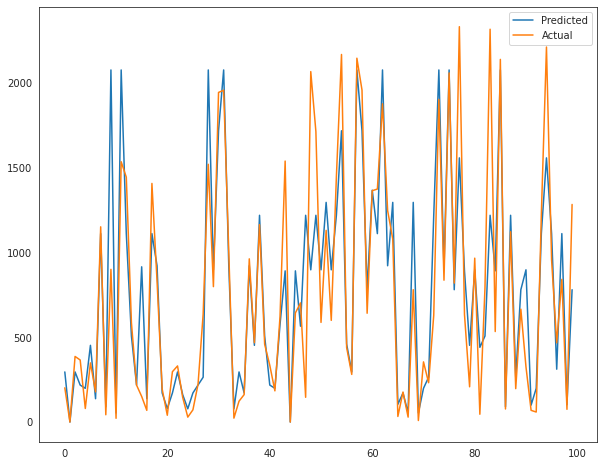

In [114]:
  plt.figure(figsize=(10,8))
  plt.plot(y_pred_DT[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [115]:
def get_features_importance (optimal_model,X_train):
  
  #shows the graph of feature importance
  
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()


## **Random Forest**

In [116]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [117]:
Y_train_pred_RF = regressor.predict(X_train) 

Y_test_pred_RF = regressor.predict(X_test)

In [118]:
y_test

array([ 202,    0,  387, ...,  241, 1430, 2235])

In [119]:
Y_test_pred_RF

array([ 333.01,    0.  ,  340.95, ...,  286.74, 1496.84, 1843.82])

In [120]:
MSE_RF = mean_squared_error(y_test, Y_test_pred_RF)
MSE.append(MSE_RF)

RMSE_RF = math.sqrt(mean_squared_error(y_test, Y_test_pred_RF))
RMSE.append(RMSE_RF)

R2_RF = r2_score(y_test, Y_test_pred_RF)
R2.append(R2_RF)

adj_r2_RF =1-(1-r2_score(y_test,Y_test_pred_RF))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_RF)

print(f"MSE:{MSE_RF},RMSE:{RMSE_RF},R2:{R2_RF},Adj_R2:{adj_r2_RF}")

MSE:48354.12207377973,RMSE:219.89570726546648,R2:0.8865579422646823,Adj_R2:0.8852647459130447


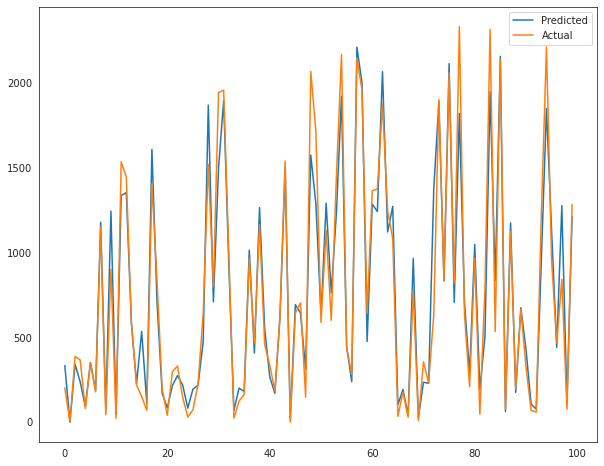

In [121]:
plt.figure(figsize=(10,8))
plt.plot(Y_test_pred_RF[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

# **XGBoost Regression**

In [122]:
from xgboost import XGBRegressor

In [123]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

[14:30:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [124]:
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

In [125]:
MSE_xgb = mean_squared_error(y_test, y_test_pred_xgb)
MSE.append(MSE_xgb)

RMSE_xgb = math.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
RMSE.append(RMSE_xgb)

R2_xgb = r2_score(y_test, y_test_pred_xgb)
R2.append(R2_xgb)

adj_r2_xgb =1-(1-r2_score(y_test,y_test_pred_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_xgb)

print(f"MSE:{MSE_xgb},RMSE:{RMSE_xgb},R2:{R2_xgb},Adj_R2:{adj_r2_xgb}")

MSE:67891.32674799045,RMSE:260.55964144124556,R2:0.8407223318640469,Adj_R2:0.8389066269707934


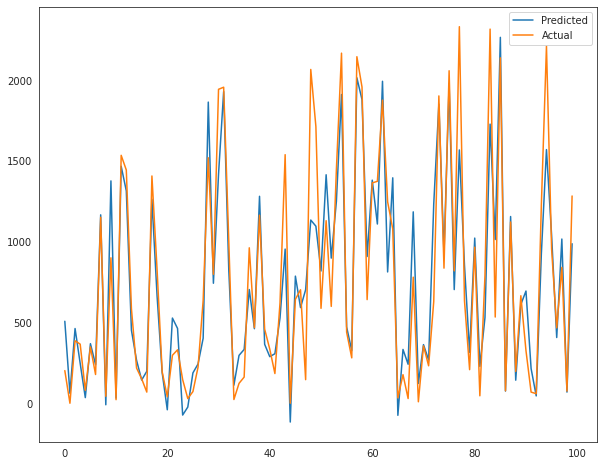

In [126]:
plt.figure(figsize=(10,8))
plt.plot(y_test_pred_xgb[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

# **LightGBM Model**

In [127]:
import lightgbm as lgb

In [128]:
lgbr=lgb.LGBMRegressor()

In [129]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

In [130]:
lgbr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 13],
                         'n_estimators': [150, 200, 250]},
             scoring='neg_mean_squared_error', verbose=5)

In [131]:
y_train_pred_lgbr = lgbr_grid.predict(X_train)
y_test_pred_lgbr = lgbr_grid.predict(X_test)

In [132]:
y_train_pred_lgbr

array([ 121.2797616 , 1355.31064593, 1800.07306753, ...,  309.14746165,
       2229.30608117, 1011.69574606])

In [133]:
y_test_pred_lgbr

array([ 342.93733344,  -30.10063175,  332.3361899 , ...,  272.79383626,
       1585.71070187, 2233.83080675])

In [134]:
MSE_lgbr = mean_squared_error(y_test, y_test_pred_lgbr)
MSE.append(MSE_lgbr)

RMSE_lgbr = math.sqrt(mean_squared_error(y_test, y_test_pred_lgbr))
RMSE.append(RMSE_lgbr)

R2_lgbr = r2_score(y_test, y_test_pred_lgbr)
R2.append(R2_lgbr)

adj_r2_lgbr =1-(1-r2_score(y_test,y_test_pred_lgbr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_lgbr)

print(f"MSE:{MSE_lgbr},RMSE:{RMSE_lgbr},R2:{R2_lgbr},Adj_R2:{adj_r2_lgbr}")

MSE:39507.71203684281,RMSE:198.7654699308781,R2:0.9073122216336521,Adj_R2:0.9062556161804575


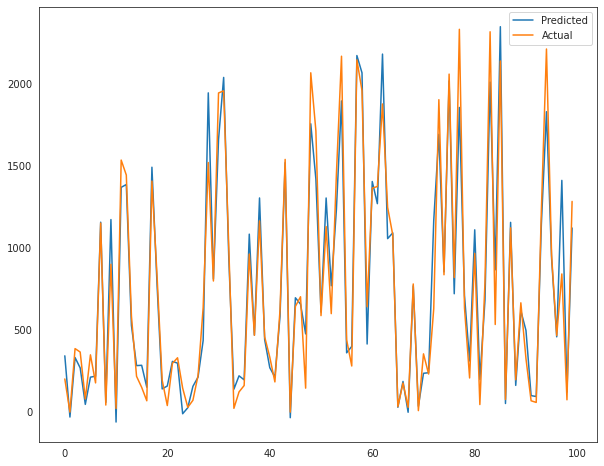

In [135]:
plt.figure(figsize=(10,8))
plt.plot(y_test_pred_lgbr[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [136]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = pd.DataFrame(X_train).describe().columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='green', align='center')
  plt.yticks(range(len(indices)), [independent_variables[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

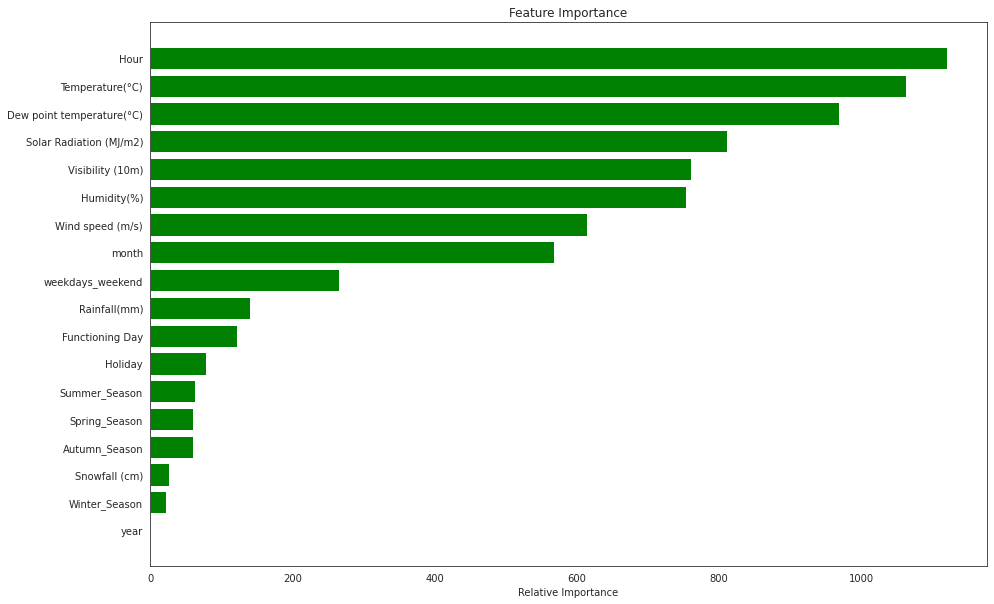

In [137]:
#getting and visualizing features importance of LightGBM model
get_features_importance(lgbr_grid.best_estimator_,X_train)

# **Different Model Metrices** 

In [138]:
all_model_matrices={'Mean_square_error':MSE,'Root_Mean_square_error':RMSE,'R2':R2,'Adjusted_R2':Adj_R2}
model_name=['Linear','Lasso','Ridge','Elasticnet','Decision_Tree','Random_Forest','xgboost','LightGBM']

matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [139]:
matrices_df

,Linear,Lasso,Ridge,Elasticnet,Decision_Tree,Random_Forest,xgboost,LightGBM
Mean_square_error,194159.768461,194086.574274,194107.613165,193937.756973,99045.657066,48354.122074,67891.326748,39507.712037
Root_Mean_square_error,440.635641,440.552578,440.576456,440.383647,314.715200,219.895707,260.559641,198.765470
R2,0.544488,0.544660,0.544610,0.545009,0.767632,0.886558,0.840722,0.907312
Adjusted_R2,0.539295,0.539469,0.539419,0.539822,0.764983,0.885265,0.838907,0.906256


# **Model Explainability**

## Shap

In [140]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [141]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

In [142]:
for_instance=2

In [143]:
#shap for lightGBM model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(lgbr_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

## ELI 5

In [144]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 10.6 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=25de0868a2f3ea09bcd6967296e3bea7b75c3630f62e040b210f0674155e5b14
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompat

In [145]:
import eli5 as eli

In [146]:
for_instance=2

In [147]:
eli.show_prediction(lgbr_grid.best_estimator_, pd.DataFrame(X_test).reset_index(drop=True).loc[[for_instance]],
                    feature_names=independent_variables[:],
                    show_feature_values=True)



1.   The green color shows how much the feature contributes to the prediction of the respective class and the weights are positive for the green color.

2. The red color has negative weights that indicate the feature isn't contributing to the prediction of that class.

3. It can be observed from the above output, eli5 shows us the contribution of each feature in predicting the output.


# **Conclusion**

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Exploration Conclusions

In this project, we explored several types of informations that influence bike rental count. Below is a quick summary of exploratory data analysis
conclusions from above pie chart:

 **Season:** Most bikes have been rented in the summer season.least bike rent count is in winter season.autumn and spring seasons have almost equal amounts of bike rent count.

 **YearwiseRentedBikeCount:** Most of the bikes have been rented in the year 2018.

**MonthwiseRentedBikeCount in year 2018:**Very less bikes have been rented in december which is winter season.

**Intensities of Rainfall:**People tend to rent bikes when there is no or less rainfall.

**Intensities of Snowfall:**People tend to rent bikes when there is no or less snowfall.

**Temperature:** People generally prefer to bike at moderate to high temperatures. We see highest rental counts between 25 to 36 degree celcius.

**Visibility Range:** people tend to rent bikes when the visibility is between 300 to 1700.

**Working or Non-working Day:** We see 2 rental patterns across the day in bike rentals count - first for a Working Day where the rental count high at peak office hours (8am and 5pm) and the second for a Non-working day where rental count is more or less uniform across the day with a peak at around noon.

**Hour of the day:** Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day.


#Modelling Conclusions:

We used 6 Regression Models to predict the bike rental count at any hour of the day - Linear Regression, Ridge, Lasso, Random Forest,XG Boost and LightGBM Model.

**Below is a summary of the model performances:**

Of all the models, we found a LightGBM Model providing the best/lowest RMSE score and highest R^2 score.
Hour of the day is the most important feature in the respect of all independent feature which provide highest bike rented count.
Thus, we have successfully built predictive models that can predict the demand for rental bikes based on different weather conditions and all other features. 
 If the model interpretability is important to the stakeholders, we can choose deploy the Light GBM model.


